In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from sklearn.model_selection import KFold


from common_functions import foo
mpl.style.use('classic')

%load_ext autoreload
%autoreload 2
results = "results"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from common_functions import latexify, format_axes, tableau20blind
latexify(14, 8)

In [9]:
params = {
    'lines.linewidth': 2,
    'lines.color': 'k',
#     'boxplot.boxprops.linewidth': 20,
    'boxplot.boxprops.color': 'k',
    'patch.linewidth': 2,
    'legend.fontsize': 14 + 4,
    'legend.framealpha': .6,
    'axes.titlesize': 14 + 4,
    "axes.labelsize": 14 + 4,
    'xtick.labelsize': 14 + 4,
    'ytick.labelsize': 16 + 4,
#     'axes.labelweight': 'bold',
    'axes.linewidth': 2,
#     'font.weight': 'bold'
    
}
matplotlib.rcParams.update(params)

In [10]:
splits = 6
datafile = '../data/beijinga_scaled.csv'
datadf = pd.read_csv(datafile, index_col=0)
allStations = datadf['station_id'].unique()
allStations.sort()

kfout = KFold(n_splits=splits, shuffle=True, random_state=0)
kfin = KFold(n_splits=splits - 1, shuffle=True, random_state=0)
datadf.head()

,latitude,longitude,ts,station_id,PM2.5
0,0.58292,0.17557,0.000000,1001.0,156.250000
0,0.58292,0.17557,0.002747,1001.0,24.833333
0,0.58292,0.17557,0.005495,1001.0,72.583333
0,0.58292,0.17557,0.008242,1001.0,30.043478
0,0.58292,0.17557,0.010989,1001.0,23.083333


In [11]:
df = pd.read_csv('emailed_results/active_kriging_results.csv')
df

,kout,kin,rmse
0,0,0,15.107037
1,0,1,15.960798
2,0,2,16.528570
3,0,3,15.294778
4,0,4,16.662367
5,1,0,19.603927
6,1,1,19.309057
7,1,2,19.480187
8,1,3,20.539130
9,1,4,18.578064


In [12]:
list_queried_stations = np.load('emailed_results/Stations_Kriging.npy')

In [13]:
temp = []
for kout in range(6):
    for kin in range(5):
        temp.append([kout, kin])
        
temp = [[3, 0]]

In [14]:

    sts_ftrain_index, sts_test_index = list(kfout.split(allStations))[kout]
    sts_train_index, sts_val_index = list(kfin.split(sts_ftrain_index))[kin]
    
    sts_test = list(allStations[sts_test_index]) # test
    sts_val = list(allStations[sts_ftrain_index[sts_val_index]]) # train
    sts_pool = list(allStations[sts_ftrain_index[sts_train_index]]) # pool
    sts_train = [] # pool

In [15]:
sts_val

[1002.0, 1006.0, 1016.0, 1019.0, 1027.0, 1031.0]

In [16]:
sts_pool

[1003.0,
 1005.0,
 1007.0,
 1008.0,
 1009.0,
 1011.0,
 1012.0,
 1013.0,
 1014.0,
 1015.0,
 1017.0,
 1018.0,
 1021.0,
 1023.0,
 1024.0,
 1025.0,
 1026.0,
 1028.0,
 1029.0,
 1030.0,
 1032.0,
 1033.0,
 1034.0,
 1036.0]

In [17]:
sts_test

[1001.0, 1004.0, 1010.0, 1020.0, 1022.0, 1035.0]

In [19]:
(list_queried_stations[0])

array([1001., 1028., 1036., 1034., 1027., 1030., 1019., 1005., 1018.,
       1026., 1006.])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1006.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1017.0, 1020.0, 1021.0, 1022.0, 1023.0, 1024.0, 1025.0, 1026.0, 1028.0, 1029.0, 1030.0, 1032.0, 1034.0, 1036.0] 1029.0


/home/apoorv/Desktop/github/.env/lib/python3.6/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


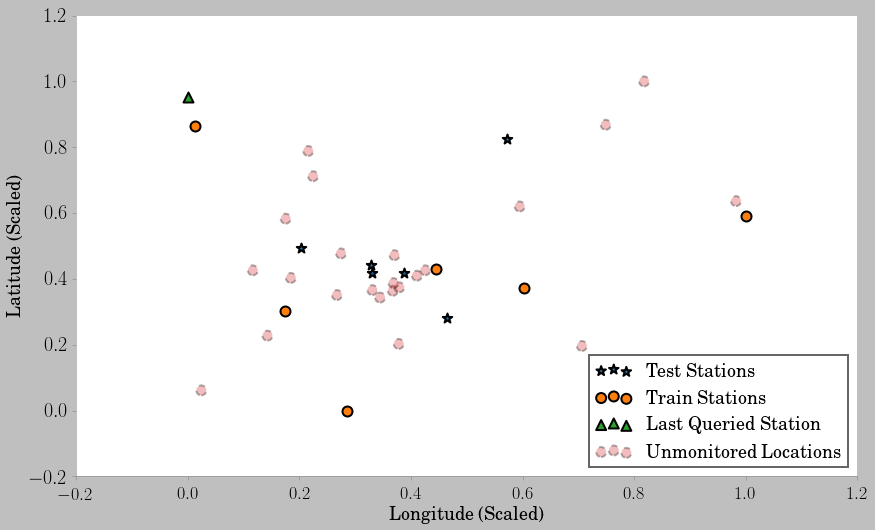

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1006.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1017.0, 1020.0, 1021.0, 1022.0, 1023.0, 1024.0, 1025.0, 1026.0, 1028.0, 1030.0, 1032.0, 1034.0, 1036.0] 1028.0


/home/apoorv/Desktop/github/.env/lib/python3.6/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


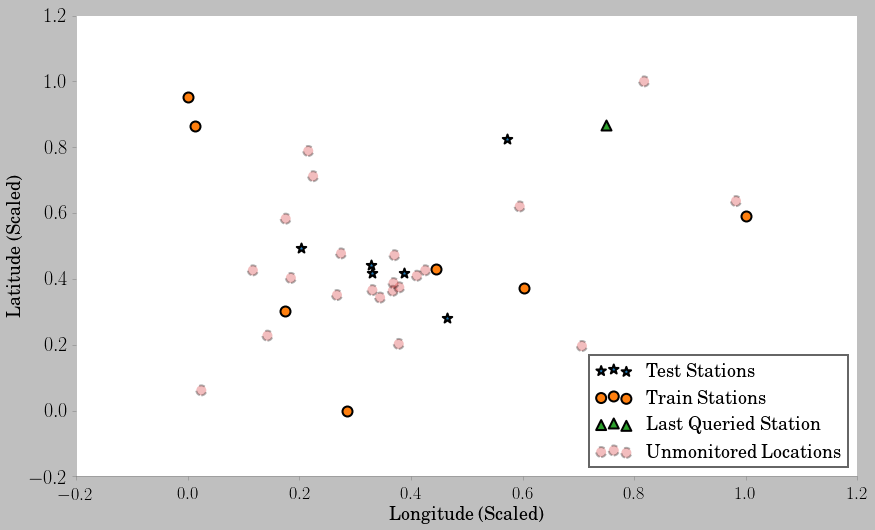

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1006.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1017.0, 1020.0, 1021.0, 1022.0, 1023.0, 1024.0, 1025.0, 1026.0, 1030.0, 1032.0, 1034.0, 1036.0] 1036.0


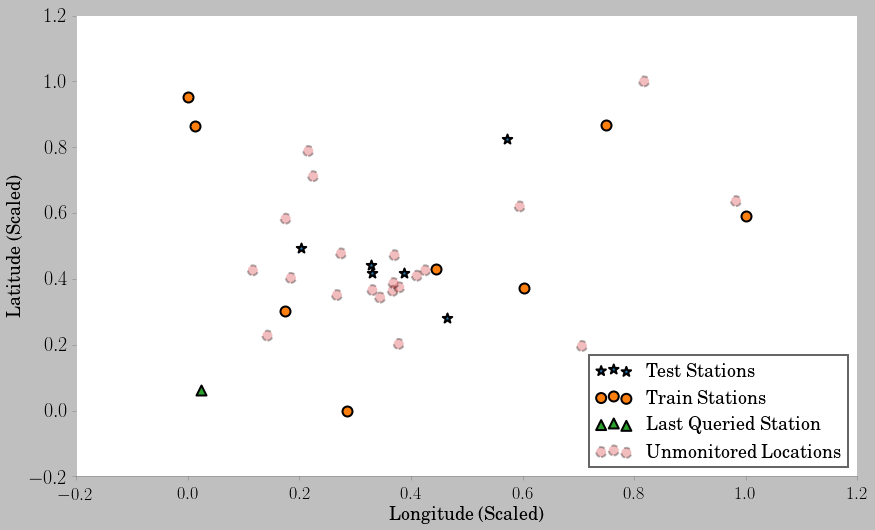

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1006.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1017.0, 1020.0, 1021.0, 1022.0, 1023.0, 1024.0, 1025.0, 1026.0, 1030.0, 1032.0, 1034.0] 1032.0


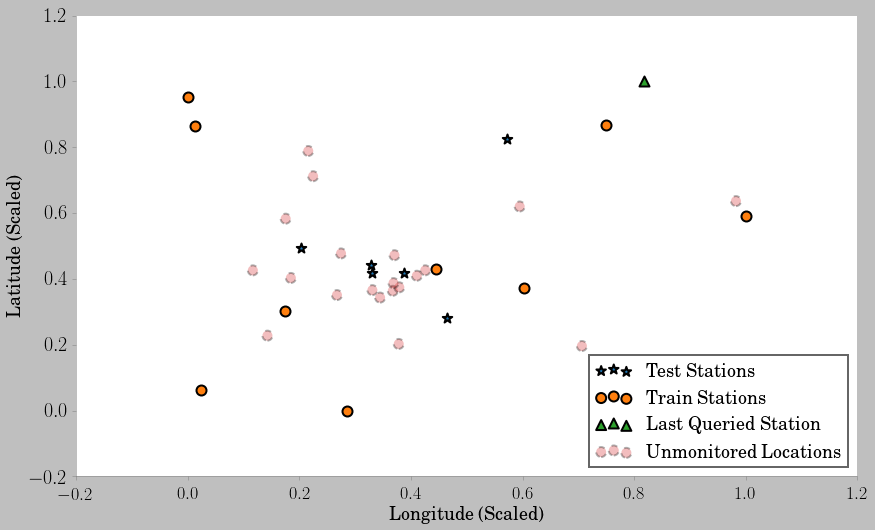

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1006.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1017.0, 1020.0, 1021.0, 1022.0, 1023.0, 1024.0, 1025.0, 1026.0, 1030.0, 1034.0] 1034.0


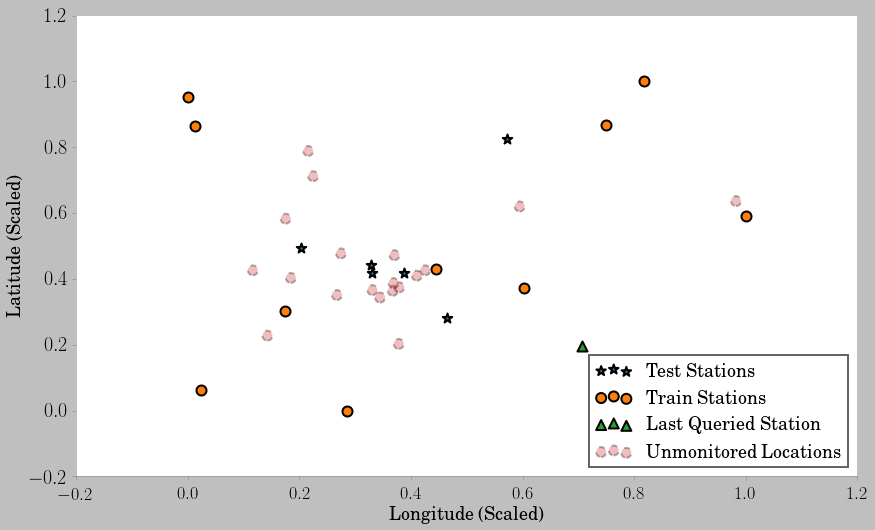

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1006.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1017.0, 1020.0, 1021.0, 1022.0, 1023.0, 1024.0, 1025.0, 1026.0, 1030.0] 1024.0


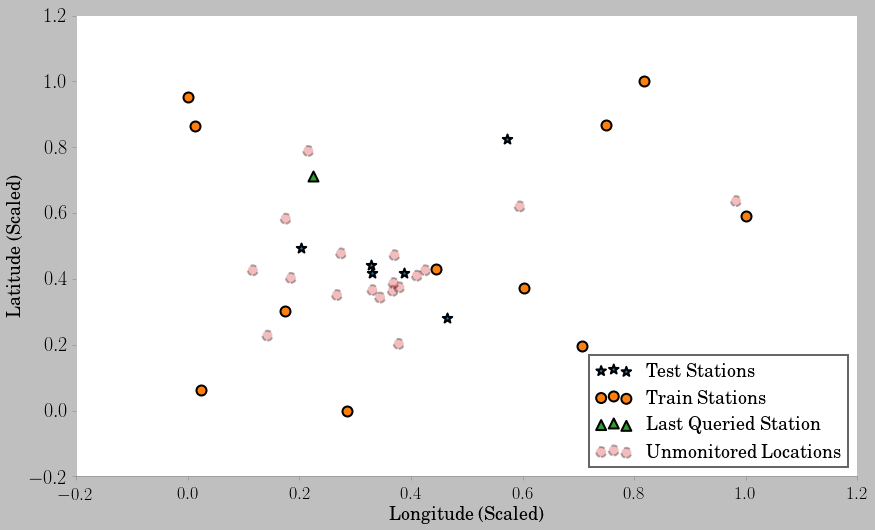

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1006.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1017.0, 1020.0, 1021.0, 1022.0, 1023.0, 1025.0, 1026.0, 1030.0] 1023.0


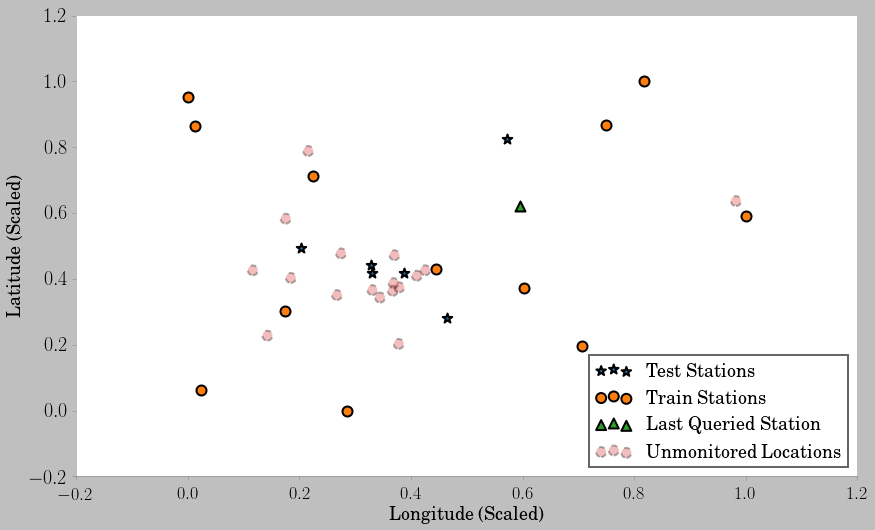

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1006.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1017.0, 1020.0, 1021.0, 1022.0, 1025.0, 1026.0, 1030.0] 1017.0


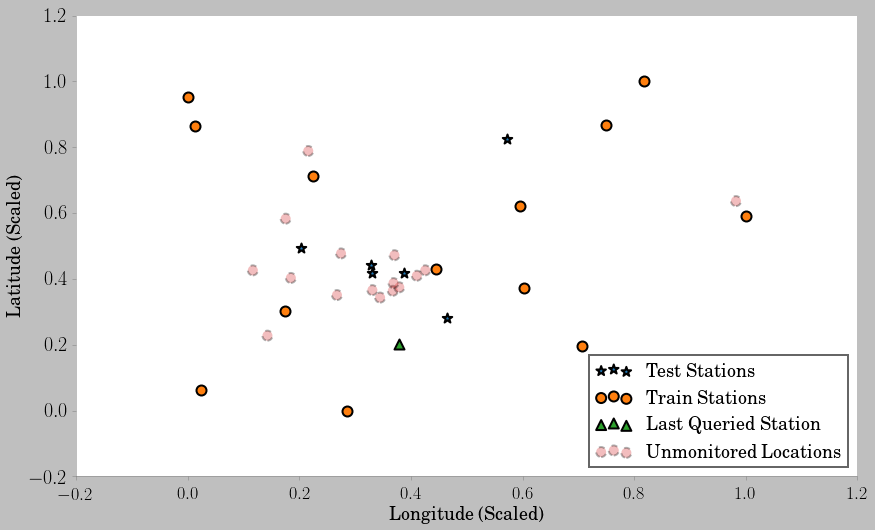

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1006.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1020.0, 1021.0, 1022.0, 1025.0, 1026.0, 1030.0] 1025.0


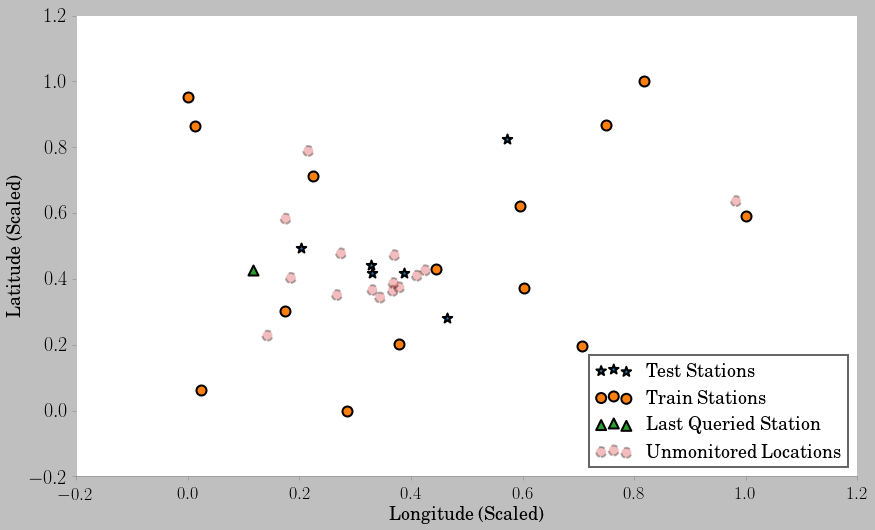

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1006.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1020.0, 1021.0, 1022.0, 1026.0, 1030.0] 1006.0


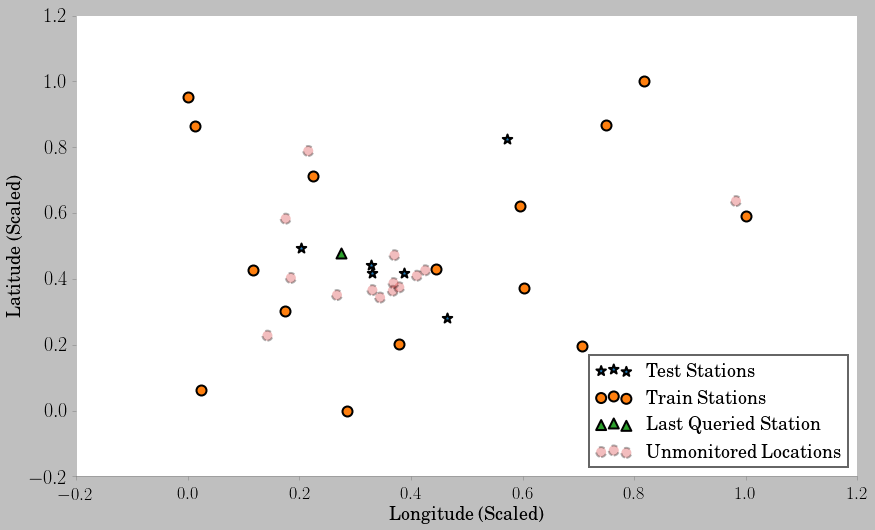

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[1001.0, 1003.0, 1005.0, 1007.0, 1009.0, 1010.0, 1011.0, 1012.0, 1016.0, 1020.0, 1021.0, 1022.0, 1026.0, 1030.0] 1030.0


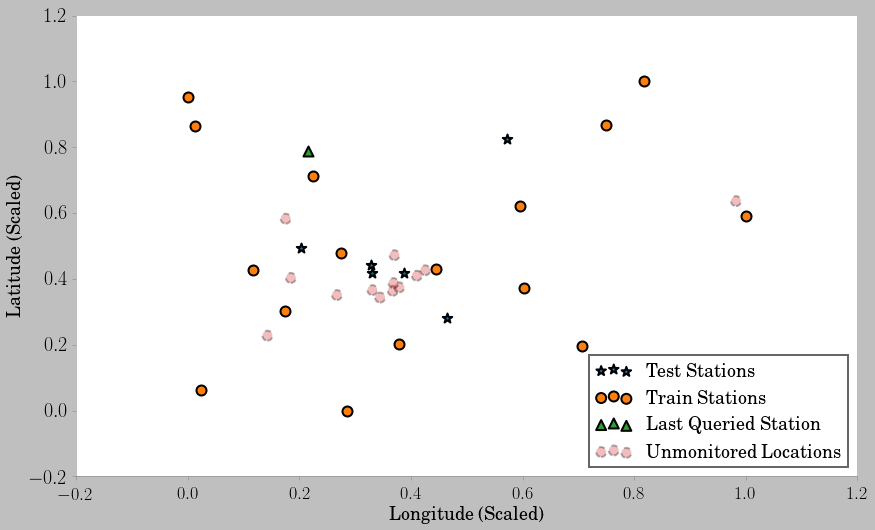

In [20]:
for kout, kin in temp:
    sts_ftrain_index, sts_test_index = list(kfout.split(allStations))[kout]
    sts_train_index, sts_val_index = list(kfin.split(sts_ftrain_index))[kin]

    # get the station ids
    sts_test = list(allStations[sts_test_index]) # test
    sts_val = list(allStations[sts_ftrain_index[sts_val_index]]) # train
    sts_pool = list(allStations[sts_ftrain_index[sts_train_index]]) # pool
    sts_train = [] # pool

    grouped = datadf.groupby("station_id")

    queried_stations = list_queried_stations[kout * 5 + kin]
    for qix, qStation in enumerate(queried_stations):
        # get the index of the stations
        print (sts_pool, qStation)
        sts_pool.remove(qStation)
        sts_train = [qStation]


        for ix, (marker, strStations, stations) in enumerate(zip(
            ["*", 'o', '^', 'o'],
            ["Test Stations", "Train Stations", "Last Queried Station", "Unmonitored Locations"], 
            [sts_test, sts_val, sts_train, sts_pool]
        )):

            longs = []
            lats = []
            for station in stations:
                tempdf = grouped.get_group(station)
                long = tempdf["longitude"].mean()
                lat = tempdf["latitude"].mean()

    #             print ("done")
    #             print (long)
    #             assert (len(long) == 1)
    #             assert (len(lat) == 1)

                longs.append(long)
                lats.append(lat)

            if ix == 3:
                linestyle = '--'
                alpha = .3
            else:
                alpha = 1
                linestyle = '-'
#             if qix in [len(queried_stations)-1, 0]:
            plt.scatter(longs, lats, 
                        label=strStations, 
                        c=tableau20blind[ix * 2],
                        s=100,
                        marker=marker,
                        linestyle = linestyle, 
                        alpha = alpha,
                       )
#         if qix in [len(queried_stations)-1, 0]:
        plt.legend(loc="upper")
        plt.xlabel("Longitude (Scaled)")
        plt.ylabel("Latitude (Scaled)")
#                 plt.title(f"{reg}")
        format_axes(plt.gca())
        if qix == 0:
            qqix = "start"
        else:
            qqix = "last"
#             plt.savefig(f'./plts/{reg}_kout{kout}_kin{kin}_{qqix}.pdf')
        plt.show()
        sts_val.append(qStation)